## Dataset generation from deformable mirror and GRIN fiber

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from lib.grid import Grid
from lib.fiber import GrinFiber
from lib.datasets import SimulatedGrinSpeckleOutputDataset, GrinLPSpeckleDataset, GrinLPDegenSpeckleDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
phases_dims = [(4,4), (6,6), (8,8), (10,10), (12,12)]
lambdas = [1064e-9, 980e-9, 800e-9, 632e-9, 532e-9, 435e-9]
grid = Grid(pixel_size=0.5e-6, pixel_numbers=(128, 128))

conds = np.zeros(shape=(len(phases_dims), len(lambdas))) * np.nan
sings = []


for phi in range(len(phases_dims)):
    sings_lamb = []

    for lamb in range(len(lambdas)):
        fiber = GrinFiber(radius=26e-6, wavelength=lambdas[lamb], n1=1.465, n2=1.45)
        dset = SimulatedGrinSpeckleOutputDataset(fiber, grid, length=1, N_modes=fiber._N_modes_degen, degen=True, noise_std=0/100)
        dset.compute(phases_dim=phases_dims[phi])

        tm = dset._transfer_matrix
        tm = tm.reshape(tm.shape[0], np.prod(tm.shape[1:]))

        del_rows = []
        for j in range(tm.shape[0]):
            if np.any(np.isnan(tm[j, :])):
                del_rows.append(j)

        tm = np.delete(tm, del_rows, axis=0)
        U, S, Vh = np.linalg.svd(tm, full_matrices=False)

        sings_lamb.append(S / np.max(S))
        conds[phi, lamb] = np.max(S) / np.min(S)

        print(f"Phi: {phases_dims[phi]}, lambda: {lambdas[lamb]*1e9}")


    sings.append(sings_lamb)

Computed couple 1/1
Phi: (4, 4), lambda: 1064.0
Computed couple 1/1
Phi: (4, 4), lambda: 979.9999999999999
Computed couple 1/1
Phi: (4, 4), lambda: 800.0
Computed couple 1/1
Phi: (4, 4), lambda: 632.0
Computed couple 1/1
Phi: (4, 4), lambda: 532.0
Computed couple 1/1
Phi: (4, 4), lambda: 435.0
Computed couple 1/1
Phi: (6, 6), lambda: 1064.0
Computed couple 1/1
Phi: (6, 6), lambda: 979.9999999999999
Computed couple 1/1
Phi: (6, 6), lambda: 800.0
Computed couple 1/1
Phi: (6, 6), lambda: 632.0
Computed couple 1/1
Phi: (6, 6), lambda: 532.0
Computed couple 1/1
Phi: (6, 6), lambda: 435.0


c:\users\saucourt\coding\mmf_lp_modes\lib\coupling.py:50: RuntimeWarning: invalid value encountered in divide
  self.field = self.field / self.energy


Computed couple 1/1
Phi: (8, 8), lambda: 1064.0
Computed couple 1/1
Phi: (8, 8), lambda: 979.9999999999999
Computed couple 1/1
Phi: (8, 8), lambda: 800.0
Computed couple 1/1
Phi: (8, 8), lambda: 632.0
Computed couple 1/1
Phi: (8, 8), lambda: 532.0
Computed couple 1/1
Phi: (8, 8), lambda: 435.0
Computed couple 1/1
Phi: (10, 10), lambda: 1064.0
Computed couple 1/1
Phi: (10, 10), lambda: 979.9999999999999
Computed couple 1/1
Phi: (10, 10), lambda: 800.0
Computed couple 1/1
Phi: (10, 10), lambda: 632.0
Computed couple 1/1
Phi: (10, 10), lambda: 532.0
Computed couple 1/1
Phi: (10, 10), lambda: 435.0
Computed couple 1/1
Phi: (12, 12), lambda: 1064.0
Computed couple 1/1
Phi: (12, 12), lambda: 979.9999999999999
Computed couple 1/1
Phi: (12, 12), lambda: 800.0
Computed couple 1/1
Phi: (12, 12), lambda: 632.0
Computed couple 1/1
Phi: (12, 12), lambda: 532.0
Computed couple 1/1
Phi: (12, 12), lambda: 435.0


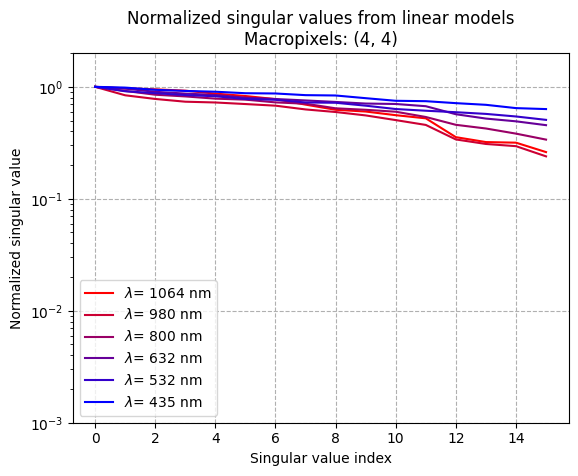

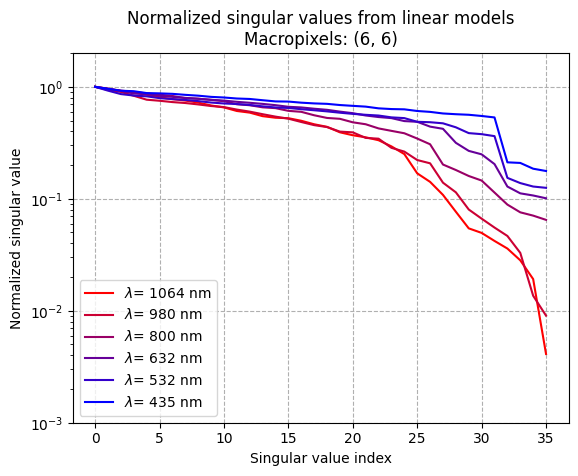

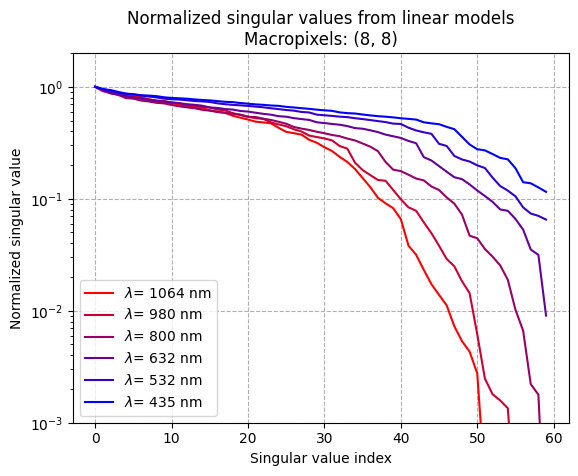

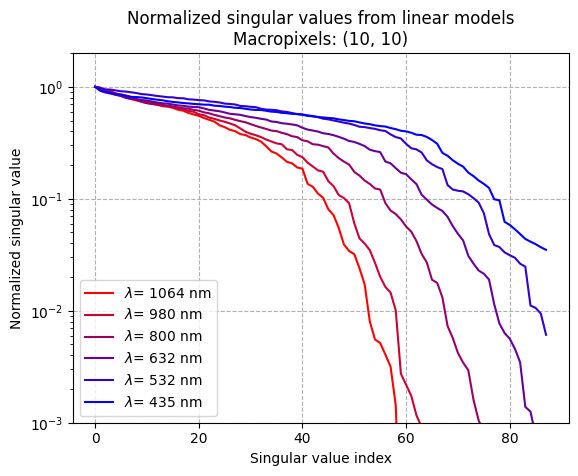

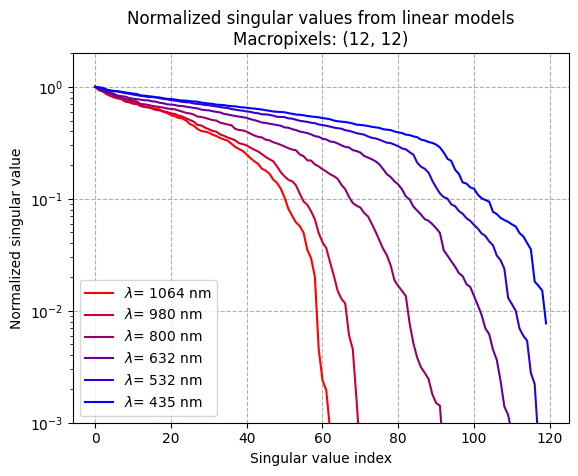

In [42]:
colors = [[1, 0, 0], [.8, 0, .2], [.6, 0, .4], [.4, 0, .6], [.2, 0, .8], [0, 0, 1]]

phases_dims = [(4,4), (6,6), (8,8), (10,10), (12,12)]
lambdas = [1064e-9, 980e-9, 800e-9, 632e-9, 532e-9, 435e-9]

for phi in range(len(phases_dims)):
    plt.figure()
    plt.grid(ls='dashed')
    plt.yscale('log')
    plt.xlabel("Singular value index")
    plt.ylabel("Normalized singular value")
    plt.title(f"Normalized singular values from linear models\nMacropixels: {phases_dims[phi]}")

    for lamb in range(len(lambdas)):
        plt.plot(sings[phi][lamb], color=colors[lamb], label=(r"$\lambda$" + f"= {lambdas[lamb] * 1e9:.0f} nm"))
    
    plt.ylim([1e-3, 2e0])
    plt.legend()
    plt.savefig(f"nsings_{phases_dims[phi]}.svg")
    plt.show()

In [64]:
n_modes = np.zeros(shape=(len(phases_dims), len(lambdas))) * np.nan

for phi in range(len(phases_dims)):
    sings_lamb = []

    for lamb in range(len(lambdas)):
        fiber = GrinFiber(radius=26e-6, wavelength=lambdas[lamb], n1=1.465, n2=1.45)
        n_modes[phi, lamb] = fiber._N_modes
        

In [65]:
print(n_modes)

[[ 64.  75. 113. 182. 257. 385.]
 [ 64.  75. 113. 182. 257. 385.]
 [ 64.  75. 113. 182. 257. 385.]
 [ 64.  75. 113. 182. 257. 385.]
 [ 64.  75. 113. 182. 257. 385.]]


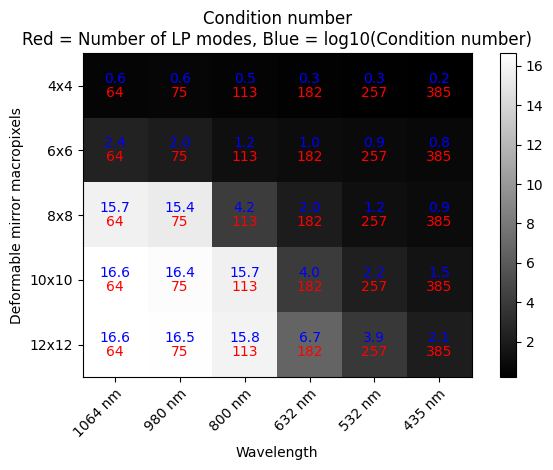

In [91]:
# plt.imshow(np.log10(conds))
# plt.colorbar()

import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

phases_labels = [f"{phases_dims[phi][0]}x{phases_dims[phi][1]}" for phi in range(len(phases_dims))]
lambdas_labels = [( f"{lambdas[lamb] * 1e9:.0f} nm") for lamb in range(len(lambdas))]


fig, ax = plt.subplots()
im = ax.imshow(np.log10(conds), cmap='gray')

# # Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(lambdas)), labels=lambdas_labels)
ax.set_yticks(np.arange(len(phases_dims)), labels=phases_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(phases_dims)):
    for j in range(len(lambdas)):
        text = ax.text(j, i, f"{n_modes[i, j]:.0f}",
                       ha="center", va="top", color="r")
        text = ax.text(j, i, f"{np.log10(conds[i, j]):.1f}",
                       ha="center", va="bottom", color="b")

ax.set_title(f"Condition number\nRed = Number of LP modes, Blue = log10(Condition number)")
ax.set_xlabel(f"Wavelength")
ax.set_ylabel(f"Deformable mirror macropixels")

fig.tight_layout()
plt.colorbar(im, ax=ax)

plt.savefig('condition_number_summary.svg')
plt.show()